In [458]:
import os
import pandas as pd
import numpy as np
import re

In [291]:
artist_dirs = [x + "/" for x in os.listdir('.')[2:] if not '.py' in x and not '.ipynb' in x and not '.csv' in x and not '.torch' in x and not 'rg_data' in x and not '.md' in x] 

In [292]:
lfiles = []

for data_dir in artist_dirs:
    for filename in os.listdir(data_dir):
        if '.csv' in filename:
            lfiles.append(data_dir + filename)

In [293]:
len(lfiles)

27932

In [294]:
all_text = ""

for filename in lfiles:
    all_text += open(filename, 'r').read()

In [459]:
all_text[0:1000]

'Lyric|Ref\r\nHttp://images.rapgenius.com/1c8f2c8e742b922c3e3e0c8b1d966e18.300x300x1.jpg|An interview with art director for GRODT; Julian Alexander  What was 50s original vision for the cover?  Julian Alexander: He wanted to have shattered glass. And I kind of envisioned it as a doorway  a shattered full glass door. And what you would see was a bullet hole in the glass and you would see his hand leaning on the glass. His posture would be kind of kneeling over  like hes leaning on the glass for support. So youd see this bullet hole, a shattered glass with a hand on it and there was gonna be blood drippin down from his hand. You wouldnt see his face, but you would see a slumped figure and blood on the hand. You would read that this person had been shot, but theyre still standing.    So how did it change from that initial idea to what the Get Rich Or Die Tryin cover eventually ended up being?   Julian Alexander: Well, I went home and put together a creative brief based on what he wanted. 

In [39]:
with open('ALL/input.txt', 'w') as f:
    f.write(all_text)

In [203]:
yt = pd.read_csv('Yg/Meet_the_Flockers_Ft_TeeCee4800_prod_by_DJ_Mustard.csv', delimiter='|')

In [254]:
for i in range(1):
    print yt.iloc[13,1].split('  ')

['YG begins to make this an anthem for stealers everywhere and tells us not to be ashamed of stealing once in our (his) life.']


In [40]:
len(all_text)

67946178

In [259]:
full_dat = []
for filename in lfiles:
    try:
        full_dat.append(pd.read_csv(filename, delimiter='|'))
    except:
        print "failed on file " + filename

In [260]:
train_dat = pd.concat(full_dat)

In [460]:
train_dat.shape

(464960, 6)

In [ ]:
len(train_dat)

In [271]:
train_dat.index = range(len(train_dat.index))

In [263]:
np.sum([len(str(x).split(' ')) for x in train_dat['Ref']])

15599473

In [264]:
np.sum([len(str(x).split(' ')) for x in train_dat['Lyric']])

5795861

In [342]:
num_lines = [len(str(x).split('  ')) for x in train_dat['Lyric']]

In [343]:
np.sum([x for x in num_lines  if x > 1])

283236

In [383]:
[x for x in train_dat['Split_Ref'] if ' <EOS> ' in str(x)]

['An interview with art director for GRODT; Julian Alexander  What was 50s original vision for the cover?  Julian Alexander: He wanted to have shattered glass <EOS> And I kind of envisioned it as a doorway  a shattered full glass door <EOS> And what you would see was a bullet hole in the glass and you would see his hand leaning on the glass <EOS> His posture would be kind of kneeling over  like hes leaning on the glass for support <EOS> So youd see this bullet hole, a shattered glass with a hand on it and there was gonna be blood drippin down from his hand <EOS> You wouldnt see his face, but you would see a slumped figure and blood on the hand <EOS> You would read that this person had been shot, but theyre still standing <EOS>    So how did it change from that initial idea to what the Get Rich Or Die Tryin cover eventually ended up being?   Julian Alexander: Well, I went home and put together a creative brief based on what he wanted <EOS> [And I thought], how are we going to tell this 

In [379]:
train_dat['Split_Lyric'][20]

"Catch stunts in my 745 <EOS> You drive me crazy, shorty <EOS> I need to see you and feel you next to me <EOS> I provide everything you need and I <EOS> Like your smile, I don't want to see you cry"

In [390]:
train_dat["l_words"] = train_dat.apply(lambda row: len(str(row['Lyric']).split(' ')), axis=1)

In [391]:
train_dat['r_words'] = train_dat.apply(lambda row: len(str(row['Ref']).split(' ')), axis=1)

In [392]:
train_dat['Ref'] = train_dat.apply(lambda x: re.sub(r"(?:\@|h?H?ttps?\://)\S+", "<URL>", str(x['Ref']), flags=re.MULTILINE), axis=1)

In [393]:
train_dat['Lyric'] = train_dat.apply(lambda x: re.sub(r"(?:\@|h?H?ttps?\://)\S+", "<URL>", str(x['Lyric']), flags=re.MULTILINE), axis=1)

In [394]:
train_dat['Split_Lyric'] = train_dat['Lyric'].apply(lambda x: str(x).replace('  ', ' <EOS> '))
train_dat['Split_Ref'] = train_dat['Ref'].apply(lambda x: str(x).replace('. ', ' <EOS> ').replace('? ', ' <EOS> '))

In [395]:
train_dat.head()

,Lyric,Ref,l_words,r_words,Split_Lyric,Split_Ref
0,<URL>,An interview with art director for GRODT; Juli...,1,850,<URL>,An interview with art director for GRODT; Juli...
1,You not like me,A callback to 50s U Not Like Me which featured...,4,16,You not like me,A callback to 50s U Not Like Me which featured...
2,"Dr. Dre & Snoop's ""Deep Cover""",<URL>,6,1,"Dr. Dre & Snoop's ""Deep Cover""",<URL>
3,G-G-G-G-G-G-Unit!,The famous saying <URL>,1,4,G-G-G-G-G-G-Unit!,The famous saying <URL>
4,I do a 187 on your motherfuckin block,187 is a slang term for the crime of murder; i...,8,31,I do a 187 on your motherfuckin block,187 is a slang term for the crime of murder; i...


In [401]:
train_dat.shape

(464960, 6)

In [428]:
len([x for x in train_dat["r_words"] if x > 100])

18473

In [467]:
train_dat_halflen = train_dat.loc[train_dat['l_words'] <= 40].loc[train_dat['r_words'] / train_dat['l_words'] <= 2]

In [489]:
train_dat.loc[train_dat['l_words'] <= 40].loc[train_dat['r_words'] / train_dat['l_words'] <= 1.5].shape

(128084, 6)

In [442]:
[x for x in train_dat.loc[train_dat['r_words'] <= 80].loc[train_dat['l_words'] <= 40]['Split_Lyric'] if '<EOS>' in x]

["Girl, it's easy to love me now <EOS> Would you love me if I was down and out? <EOS> Would you still have love for me?",
 'If I got locked up and sentenced to a quarter century <EOS> Could I count on you to be there to support me mentally?',
 'If I went back to a hoopty from a Benz <EOS> Would you poof and disappear like some of my friends?',
 "I get out and peel a nigga cap, chill and drive <EOS> I'm asking questions to find out how you feel inside",
 "If I ain't rap cause I flip burgers at Burger King <EOS> Would you be ashamed to tell your friends you're feeling me?",
 "If I was with some other chick and someone happened to see <EOS> And when you asked me about it I said it wasn't me <EOS> Would you believe me or up and leave me?",
 "How deep is our bond if that's all it takes for you to be gone? <EOS> We only humans, girl, we make mistakes <EOS> To make it up, I'll do whatever it takes",
 'I love you like a fat kid love cake <EOS> You know my style, I say anything to make you smil

In [153]:
train_dat_short = train_dat.loc[train_dat['r_words'] <= 80].loc[train_dat['l_words'] <= 40]
train_dat_short.shape

(338772, 4)

In [492]:
import string

valid_chars = string.letters + string.digits + "\n" + " " + "." + "<>"

def valid_str(x):
    text_filt = ""
    
    x = x.replace('&',' and ')
    
    for char in x:
        if char in valid_chars:            
            text_filt += char
        
    return text_filt.replace('50', 'fifty').replace('.', ' . ').lower()

In [496]:
train_dat_halflen["Split_Lyric"] = train_dat_halflen["Split_Lyric"].apply(lambda x: valid_str(x))

In [497]:
train_dat_halflen["Split_Ref"] = train_dat_halflen["Split_Ref"].apply(lambda x: valid_str(x))

In [498]:
train_dat_halflen.head()

,Lyric,Ref,l_words,r_words,Split_Lyric,Split_Ref
2,dr . dre and snoops deep cover,<url>,6,1,dr . dre and snoops deep cover,<url>
5,they say good things should happen to those wh...,patience welcomes positivity into the lives of...,19,33,they say good things should happen to those wh...,patience welcomes positivity into the lives of...
7,im the first one out and last one on the corne...,death could be around the corner for any man ....,22,26,im the first one out and last one on the corne...,death could be around the corner for any man <...
10,these rappers is talkin bout bricks in they rh...,reference to a line from fifty cents lifes on ...,18,11,these rappers is talkin bout bricks in they rh...,reference to a line from fifty cents lifes on ...
16,and my new fourfifthll cause a hollowtip diet,the hollowtip bullets from yayos . 45 caliber...,8,15,and my new fourfifthll cause a hollowtip diet,the hollowtip bullets from yayos . 45 caliber...


In [500]:
full_size = train_dat_halflen.shape[0]
val_size = int(full_size // 5.0)
train_size = int(full_size - val_size)

# Shuffle
train_dat_halflen = train_dat_halflen.iloc[np.random.permutation(full_size)]

train_dat_halflen_part = train_dat_halflen[:train_size]
val_dat_halflen = train_dat_halflen[-val_size:]

In [501]:
val_dat_halflen.shape

(36745, 6)

In [502]:
train_dat_halflen_part.shape

(146984, 6)

In [125]:
train_dat_short_part.shape

(227412, 4)

In [126]:
val_dat_short.shape

(56853, 4)

In [505]:
train_dat_halflen_part['Split_Lyric'].to_csv('rg_lyrics_train_4080_split.csv', index=False)
train_dat_halflen_part['Split_Ref'].to_csv('rg_references_train_4080_split.csv', index=False)

val_dat_halflen['Split_Lyric'].to_csv('rg_lyrics_val_4080_split.csv', index=False)
val_dat_halflen['Split_Ref'].to_csv('rg_references_val_4080_split.csv', index=False)

In [506]:
pwd

u'/Users/AndyKeller/Desktop/UCSD/Projects/Rap_GeNet'

In [210]:
ref_words = [sentence.split(' ') for sentence in train_dat_short["Ref"]]
lyric_words = [sentence.split(' ') for sentence in train_dat_short["Lyric"]]

In [211]:
ref_words = np.array(ref_words).flatten()
lyric_words = np.array(lyric_words).flatten()

In [213]:
np.unique(ref_words).shape

(171290,)

In [ ]:
np.hstack(ref_words[0:5])

In [194]:
np.sum(train_dat['l_words'] >= 1)

251724

In [177]:
train_dat_short['l_words'].sum()

2034150

In [168]:
train_dat.shape

(251724, 4)

In [398]:
%matplotlib inline

(0, 100)

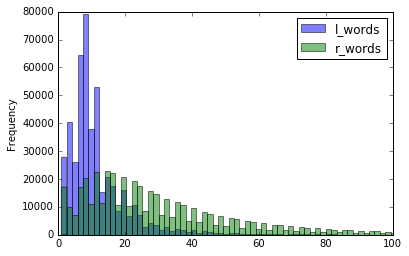

In [399]:
import pylab as plt
plt.figure()
train_dat.plot.hist(alpha=0.5, bins=5000)
plt.xlim([0,100])

In [48]:
all_lyrics = ""
for filename in lfiles:
    f = open(filename, 'r')
    
    all_lyrics += f.read()

In [49]:
len(all_lyrics)

22909983

In [50]:
with open("ALL/" + "input.txt", "w") as text_file:
    text_file.write(all_lyrics)

In [23]:

artist_urls = ['http://genius.com/artists/Ab-soul', 
               'http://genius.com/artists/Action-bronson',
               'http://genius.com/artists/Aesop-rock',
               'http://genius.com/artists/Anderson-paak',
               'http://genius.com/artists/A-ap-ferg',
               'http://genius.com/artists/A-ap-mob',
               'http://genius.com/artists/A-ap-rocky',
               'http://genius.com/artists/Akon',
                'http://genius.com/artists/Apollo-brown',
                'http://genius.com/artists/Azizi-gibson',
                'http://genius.com/artists/Big-sean',
                'http://genius.com/artists/Boosie-badazz',
                'http://genius.com/artists/Bet-hip-hop-awards',
                'http://genius.com/artists/Busta-rhymes',
                'http://genius.com/artists/Chance-the-rapper',
                'http://genius.com/artists/Chief-keef',
                'http://genius.com/artists/Childish-gambino',
                'http://genius.com/artists/Curren-y',
               'http://genius.com/artists/Casey-veggies',
               'http://genius.com/artists/Denzel-curry',
               'http://genius.com/artists/Drake',
               'http://genius.com/artists/Drake-and-future',
               'http://genius.com/artists/Dr-dre',
               'http://genius.com/artists/E-40',
               'http://genius.com/artists/Earl-sweatshirt',
               'http://genius.com/artists/Eminem',
               'http://genius.com/artists/Eazy-e',
               'http://genius.com/artists/Fetty-wap',
               'http://genius.com/artists/Flatbush-zombies',
               'http://genius.com/artists/Freddie-gibbs',
               'http://genius.com/artists/Future',
               'http://genius.com/artists/Gucci-mane',
               'http://genius.com/artists/G-unit',
               'http://genius.com/artists/Gza',
               'http://genius.com/artists/Iamsu',
               'http://genius.com/artists/Ilovemakonnen',
               'http://genius.com/artists/Jay-z',
               'http://genius.com/artists/Jay-electronica',
               'http://genius.com/artists/Joey-bada',
               'http://genius.com/artists/Juicy-j',
               'http://genius.com/artists/J-dilla',
               'http://genius.com/artists/J-kwon',
               'http://genius.com/artists/Kanye-west',
               'http://genius.com/artists/Kendrick-lamar',
               'http://genius.com/artists/Lil-wayne',
               'http://genius.com/artists/Logic',
               'http://genius.com/artists/Migos',
               'http://genius.com/artists/Nas',
               'http://genius.com/artists/The-notorious-big',
               'http://genius.com/artists/Nwa',
               'http://genius.com/artists/Odd-future',
               'http://genius.com/artists/Oddisee',
               'http://genius.com/artists/Pusha-t',
               'http://genius.com/artists/Rae-sremmurd',
               'http://genius.com/artists/Rich-homie-quan',
               'http://genius.com/artists/Rich-gang',
               'http://genius.com/artists/Rick-ross',
               'http://genius.com/artists/Rza',
               'http://genius.com/artists/Schoolboy-q',
               'http://genius.com/artists/Snoop-dogg',
               'http://genius.com/artists/Tech-n9ne',
               'http://genius.com/artists/Tory-lanez',
               'http://genius.com/artists/Ty-dolla-sign',
               'http://genius.com/artists/Tyler-the-creator',
               'http://genius.com/artists/Tyga',
               'http://genius.com/artists/Wiz-khalifa',
               'http://genius.com/artists/Wu-tang-clan',
               'http://genius.com/artists/Yg',
               'http://genius.com/artists/Young-thug']
